# Financial Engineering

###### Andrew Cachia, Dec 2018

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt  
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
from scipy.optimize import minimize

### Data
Retrieving daily closing price data for the following stocks:
- S&P500 Index [SPY]
- FTSE 100 Index [UKX]
- Gold SPDY [GLD]
- Google [GOOG]
- Amazon [AMZN]

In [2]:
date_start = "2014-01-01"
date_end = "2017-12-31"

symbols = ['SPY','UKX','GLD','GOOG','AMZN']

data = pd.DataFrame()
yf.pdr_override() 
data = pdr.get_data_yahoo(symbols, start=date_start, end=date_end)
data

[*********************100%***********************]  5 of 5 downloaded


Open                                                   \
                   AMZN         GLD         GOOG         SPY         UKX   
Date                                                                       
2013-12-31   394.579987  114.610001   552.526367  184.070007         NaN   
2014-01-02   398.799988  117.930000   554.125916  183.979996         NaN   
2014-01-03   398.290009  118.639999   553.897461  183.229996         NaN   
2014-01-06   395.850006  119.760002   552.908875  183.490005         NaN   
2014-01-07   395.040009  118.459999   558.865112  183.089996         NaN   
2014-01-08   398.470001  117.989998   569.297241  183.449997         NaN   
2014-01-09   403.709991  118.110001   568.025513  184.110001         NaN   
2014-01-10   402.529999  119.720001   565.859619  183.949997         NaN   
2014-01-13   397.980011  120.269997   559.595398  183.669998         NaN   
2014-01-14   392.130005  120.540001   565.298279  182.289993  675.719971   
2014-01-15   398.940002  119.190002   572.769714  184.100006  676.690002   
2014-01-16   393.679993  119.839996   570.837280  184.279999  681.989990   
2014-01-17   394.260010  120.349998   574.687195  184.100006  681.539978   
2014-01-21   403.000000  119.230003   576.714050  184.699997  683.669983   
2014-01-22   408.000000  119.650002   579.535706  184.490005  683.429993   
2014-01-23   401.000000  120.970001   576.252014  183.369995  682.630005   
2014-01-24   398.160004  122.059998   571.786072  181.600006  677.330017   
2014-01-27   390.500000  121.650002   559.411560  179.059998  666.369995   
2014-01-28   387.399994  121.320000   551.572571  178.139999  655.070007   
2014-01-29   392.160004  122.190002   555.944092  177.580002  657.229980   
2014-01-30   393.769989  119.669998   568.800476  178.830002  654.429993   
2014-01-31   371.760010  120.650002   581.890381  177.009995  653.849976   
2014-02-03   358.980011  120.470001   585.789978  177.970001  651.039978   
2014-02-04   349.589996  120.410004   565.318176  174.949997  646.570007   
2014-02-05   346.000000  121.760002   567.995728  174.779999  644.929993   
2014-02-06   347.399994  121.379997   571.845703  175.580002  645.789978   
2014-02-07   358.980011  121.239998   580.042358  178.309998  655.830017   
2014-02-10   361.609985  122.800003   582.113892  179.699997  657.169983   
2014-02-11   361.839996  123.379997   586.271851  180.160004  659.159973   
2014-02-12   356.429993  124.400002   590.658325  182.250000  667.270020   
...                 ...         ...          ...         ...         ...   
2017-11-16  1130.160034  121.449997  1022.520020  257.519989         NaN   
2017-11-17  1138.280029  122.150002  1034.010010  258.220001         NaN   
2017-11-20  1129.770020  122.300003  1020.260010  258.140015         NaN   
2017-11-21  1132.859985  121.669998  1023.309998  259.179993         NaN   
2017-11-22  1141.000000  122.260002  1035.000000  260.000000         NaN   
2017-11-24  1160.699951  122.360001  1035.869995  260.320007         NaN   
2017-11-27  1202.660034  123.260002  1040.000000  260.410004         NaN   
2017-11-28  1204.880005  123.050003  1055.089966  260.760010         NaN   
2017-11-29  1194.800049  122.239998  1042.680054  263.019989         NaN   
2017-11-30  1167.099976  121.440002  1022.369995  263.760010         NaN   
2017-12-01  1172.050049  120.940002  1015.799988  264.760010         NaN   
2017-12-04  1173.849976  121.150002  1012.659973  266.309998         NaN   
2017-12-05  1128.260010  120.099998   995.940002  263.190002         NaN   
2017-12-06  1137.989990  120.040001  1001.500000  263.299988         NaN   
2017-12-07  1156.589966  119.010002  1020.429993  264.070007         NaN   
2017-12-08  1170.400024  118.489998  1037.489990  265.160004         NaN   
2017-12-11  1164.599976  118.370003  1035.500000  266.309998         NaN   
2017-12-12  1166.510010  117.650002  1039.630005  267.209991         NaN   
2017-12-13  1170.000000  118.190002  1046.119995  267.059998       

### Calculating logarithmic returns
We use logarithmic returns as this will allow us to assume that prices are distributed log normally. This is convenient since much of classic statistics assumes log normality. 

In [3]:
returns = data['Adj Close'] / data['Adj Close'].shift(1)
returns = returns.dropna()
returns = np.log(returns)
returns

,AMZN,GLD,GOOG,SPY,UKX
Date,,,,,
2014-01-15,-0.004210,-0.001920,-0.000679,0.005376,0.007802
2014-01-16,-0.000177,0.001086,0.006595,-0.001301,-0.000660
2014-01-17,0.009580,0.009472,-0.004933,-0.004238,0.002037
2014-01-21,0.018447,-0.010223,0.011382,0.002936,0.000732
2014-01-22,-0.006185,-0.004270,0.001134,0.000651,-0.001171
2014-01-23,-0.011611,0.021579,-0.004232,-0.008227,-0.007794
2014-01-24,-0.031166,0.004097,-0.031764,-0.021567,-0.016314
2014-01-27,-0.003411,-0.010935,-0.020315,-0.004931,-0.017103
2014-01-28,0.020879,-0.000083,0.019585,0.005937,0.003292


##### Generic Functions

In [4]:
def mean(list):
    return list.sum() / len(list)

def generic_function(X,Y,exp):
    results = {}
    for i in X:
        sum = 0
        for j in X[i]:
            sum += (j - Y[i])**exp
        results[i] = sum / len(X[i])
    
    return results

def variance(list,mean_list):
    return generic_function(list, mean_list, 2)

##### Standard Deviation
Standard Deviation is used to describe the hisotrical volatility of an instrument. 
The greater the standard deviation, the larger the price range and fluctuations.
\begin{equation*}
\sqrt{\frac{\sum(X - \overline{X}) ^2} {N}}
\end{equation*}

In [5]:
def std_dev(list,mean_list):
    var = variance(list,mean_list)
    for i in var:
        var[i] = np.sqrt(var[i])
    return var

##### Skewness
Skewness is used to measure the differnce in the length of the tails, i.e. how symmetrical or not a distribution is.
Negative skewness means there is a substantial probability of a large negative return. 
Positive skewness means that there is a greater-than-normal probability of a large positive return.
Fisher-Pearson coefficient of skewness:
\begin{equation*}
\frac
{\sum\frac{(X - \overline{X})^3}{N} } 
{s^3}
\end{equation*}

In [6]:
def skewness(list,mean_list):
    results = {}
    num = generic_function(list, mean_list, 3)
    list_std_dev = std_dev(list,mean_list)
    for i in list_std_dev:
        list_std_dev[i] = list_std_dev[i]**3
        results[i] = num[i] / list_std_dev[i]
    return results

##### Kurtosis
Kurtosis is used to measure the extreme values within either tail of the distribution.
It is used in finance to determine the likelihood of the investor experiencing extreme positive or negative returns.
\begin{equation*}
\frac
{\sum\frac{(X - \overline{X})^4}{N} } 
{s^4}
\end{equation*}

In [7]:
def kurtosis(list,mean_list):
    results = {}
    num = generic_function(list, mean_list, 4)
    var = variance(list,mean_list)
    for i in var:
        var[i] = var[i]**2
        results[i] = num[i] / var[i]
    return results

##### Annual Volatility

In [8]:
def annualVolatility(volatility_list):
    results = {}
    for i in volatility_list:
        results[i] = (volatility_list[i] * np.sqrt(250)) * 100
        
    return results

### Calculating Distribution Moments

In [9]:
avg_return = mean(returns)
volatility = std_dev(returns, avg_return)
dkurtosis = kurtosis(returns, avg_return)
dskewness = skewness(returns, avg_return)

#annual_return = (avg_return * 250) * 100
annual_return = (((1 + avg_return)**250 - 1) * 100)
annual_volatility = annualVolatility(volatility)

I = pd.Index(["Average Return", "Volatility", "Kurtosis", "Skewness", "Annual Return", "Annual Volatility"])
data = [avg_return.to_dict(), volatility, dkurtosis, dskewness, annual_return.to_dict(), annual_volatility]
pd.DataFrame(data, index=I)

,AMZN,GLD,GOOG,SPY,UKX
Average Return,0.000896,0.000049,0.000425,0.000333,-0.000061
Volatility,0.021390,0.009785,0.015841,0.008891,0.188588
Kurtosis,11.977623,4.939316,17.242290,4.999455,148.864949
Skewness,0.179680,0.349853,1.444563,-0.332395,-0.076019
Annual Return,25.084074,1.236226,11.212128,8.676473,-1.516534
Annual Volatility,33.819813,15.472209,25.047096,14.058236,298.184522


From the results shown above, it seems that the FTSE was not only the worst perfoming index, but also that with the highest risk. This is probably due to a number of economic factors, including Brexit, which created a lot of uncertainty and instability within the market.

The S&P500 index was the highest perfoming in terms of average return, and also managed to retain stable with the lowest volatility.

An interesting factor is that of the Kurtosis. The incredibly high kurtosis displayed by the FTSE index indicates the likelihood of extremes being present in the market. Whilst here the kurtosis is positive, meaning that the investor has a good chance of experiencing high positive extremes, it also further indicates the amount of instability within this market.

The S&P 500 had a solid 8% annual return, solidfying it's status as the industry benchmark. It also kept a low and stable volatility, as did Gold, whereas the FTSE was way too high.



##### Covariance
Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.
\begin{equation*}
\frac{1}{N}\sum_{i=1}^N(X - \overline{X})(Y - \overline{Y})
\end{equation*}

In [10]:
def covariance(X,Y):
    meanX = mean(X)
    meanY = mean(Y)

    sum = 0

    for i in range(0, len(X)):
        sum += ((X[i] - meanX) * (Y[i] - meanY))

    return sum/(len(X)-1)

##### Beta
Beta is used to determine the sensitivity of a stock's volatility in relation to the market.

\begin{equation*}
\frac{Cov(r_p, r_b)}{Var(r_b)}
\end{equation*}

In [11]:
def beta(X,Y):
    meanX = mean(X)
    covarianceXY = covariance(X,Y)
    varianceY = sum([(i-meanX)**2 for i in Y]) / len(Y)
    
    return covarianceXY / varianceY

In [12]:
beta_google = beta(returns['GOOG'],returns['SPY'])
beta_amazon = beta(returns['AMZN'],returns['SPY'])
print(beta_google)
print(beta_amazon)

1.0869498298154234
1.1814121394831598


# Mean-Variance Portfolio Theory

Portfolio Variance:

$ \theta_p^2 = w_A^2\theta_A^2 + w_B^2\theta_B^2 + w_C^2\theta_C^2 + 2w_Aw_BCov_{AB} + 2w_Bw_CCov_{BC} + 2w_Aw_CCov_{AC} $

In [13]:
covarianceAB = covariance(returns['SPY'],returns['UKX'])
covarianceBC = covariance(returns['UKX'],returns['GLD'])
covarianceAC = covariance(returns['SPY'],returns['GLD'])

def portfolio_stats(w1,w2,w3):

    portfolio_return = w1*annual_return['SPY'] + w2*annual_return['UKX'] + w3*annual_return['GLD']
    
    portfolio_variance = w1**2 * annual_volatility['SPY'] + w2**2 * annual_volatility['UKX'] + w3**2 * annual_volatility['GLD'] \
        + 2*w1*w2*covarianceAB \
        + 2*w2*w3*covarianceBC \
        + 2*w1*w3*covarianceAC
    
    return portfolio_return, portfolio_variance

#### Equal Weightings

In [14]:
w1 = 1/3
w2 = 1/3
w3 = 1/3

portfolio_return, portfolio_variance  = portfolio_stats(w1,w2,w3)

print(portfolio_return)
print(portfolio_variance)

2.7987216101238928
36.41278129026425


#### Simulation with 2000 different weighting combinations

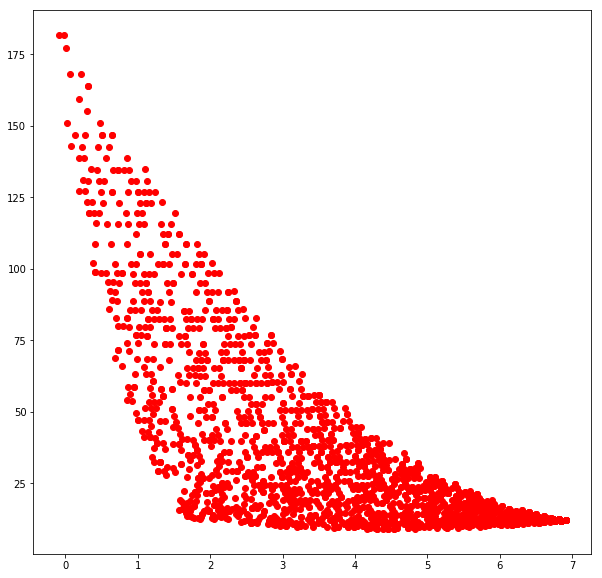

In [15]:
x = []
y = []

for i in range(0,2000):
    w1 = round(random.uniform(0.1,0.8), 2)
    w2 = round(random.uniform(0.1,0.9-w1), 2)
    w3 = 1 - w2 - w1
    
    portfolio_return, portfolio_variance  = portfolio_stats(w1,w2,w3)
    
    x.append(portfolio_return)
    y.append(portfolio_variance)
    
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro', label='Data')

[0.1 0.8 0.1]


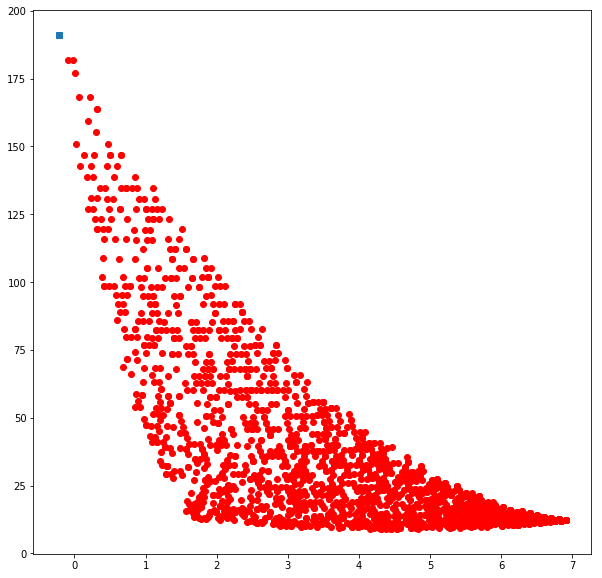

In [16]:
def sharpe_ratio(params):
    w1,w2,w3 = params
    
    portfolio_return, portfolio_variance  = portfolio_stats(w1,w2,w3)
    
    portfolio_std_dev = np.sqrt(portfolio_variance)
    
    return portfolio_return/portfolio_std_dev

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })

res = minimize(sharpe_ratio,
                   [0.5,0.5,0.5], 
                   bounds=((0.1,0.9),(0.1,0.9),(0.1,0.9)),
                   constraints=my_constraints)
print(res.x)

px,py = portfolio_stats(res.x[0], res.x[1],res.x[2])

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro', label='Data')
plt.plot(px, py, 's', label='Data')